<a href="https://colab.research.google.com/github/theyungcheese/daniildunaev/blob/main/Homework_01_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Магистратура "Аналитика больших данных". Введение в машинное обучение

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 1. Регрессия

Задание выполнил(а):

    (впишите свои фамилию и имя)

В этом домашнем задании вам будет необходимо обучить модель регрессии для предсказания стоимости автомобилей (10 основных баллов + 2.5 бонусных)

> Оценка за домашнее задание = $min(\text{ваш балл}, 12.5)$

## Общая информация

__Внимание!__  

* Домашнее задание выполняется самостоятельно
* Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов
* Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

## Импорт библиотек, установка констант

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
CARS_TRAIN = 'https://github.com/evgpat/datasets/raw/refs/heads/main/cars_train.csv'
CARS_TEST = 'https://github.com/evgpat/datasets/raw/refs/heads/main/cars_test.csv'

In [3]:
RANDOM_STATE = 42

In [4]:
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

## Задание 0

Для чего фиксируем сиды в ноутбуке?

Сиды в ноутбуке необходимо фиксировать для:
    1. Исключения вероятности отображения различных результатов.
    2. При сравнение нескольких моделей необходимо делать это в одном сиде.

## Часть 1 | EDA




Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (3 балла)
- Визуализации признаков и их анализ (1 балл+0.5)

Всего можно набрать 4 основных балла и 0.5 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (3 балла)**

In [5]:
df_train = pd.read_csv(CARS_TRAIN)
df_test = pd.read_csv(CARS_TEST)

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.5 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски. Выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд

In [6]:
missing_columns = df_train.columns[df_train.isnull().any()]
print('Колонки с пропущенными значениями:', missing_columns.tolist())

Колонки с пропущенными значениями: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [7]:
duplicate_count = df_train.duplicated().sum()
print('Количество дубликатов:', duplicate_count)

Количество дубликатов: 985


In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=620fad796434b9fd1d0e8857e1f551db80b97b953ecc756342eaf0ed0478e296
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Отчет по датасету CARS_TRAIN", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:01<00:00, 12.55it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Выводы:
Показателей: 13
Значений: 6999
Пропущенных: 1005 (1.1%)
Дубликаты: 493 (7%)
Типы переменных: Текстовые - 5, Численные - 4, Категориальные - 4
Корреляция: : selling_price и year имеют наибольшую корреляцию, а наименьшую с km_driven и selling_price

### **Задание 2 (0.4 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [ ]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [ ]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [ ]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [ ]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [ ]:
1. Год выпуска: в обоих датафреймах среднее меньше медианы следовательно присутствует левосторонняя асимметрия.
2. Цена: в обоих датафреймах среднее больше медианы следовательно присутствует правосторонняя асимметрия.
3. Пробег: в тренировочном датафрейме ситуация аналогична "Цене", а в тестовом среднее и медиана близки, значит распределение более симметрично.
4. Мощность: аналогично "Цене".

### **Задание 3 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько?
- [ ] Отобразите такие объекты
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков

In [8]:
feature_columns = df_train.columns.difference(['selling_price'])

duplicates = df_train[df_train.duplicated(subset=feature_columns, keep=False)]

print('Количество объектов с одинаковым признаковым описанием', duplicates.shape[0])

Количество объектов с одинаковым признаковым описанием 1799


In [ ]:
print(duplicates)

                                          name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4

In [9]:
df_train_cleaned = df_train.drop_duplicates(subset=feature_columns, keep='first')
df_train_cleaned.reset_index(drop=True, inplace=True)
df_train = df_train_cleaned

In [10]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.7 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [11]:
clmns = ['mileage', 'engine', 'max_power']

for col in clmns:
    for df in [df_train, df_test]:
        df[col] = pd.to_numeric(df[col].str.extract(r'([\d\.]+)')[0], errors='coerce')

In [12]:
df_train = df_train.copy()
df_train['torque_str'] = df_train['torque'].astype(str)
df_train['torque'] = df_train['torque_str'].str.extract(r'([\d\.]+)').astype(float)
df_train['max_torque_rpm'] = df_train['torque_str'].str.replace(r'[\s\(\),]', '', regex=True).str.lower()
df_train[['max_torque_rpm', 'max_torque_rpm_unit']] = df_train['max_torque_rpm'].str.extract(r'(\d+\.?\d*)(rpm|kgm@rpm)')
df_test = df_test.copy()
df_test['torque_str'] = df_test['torque'].astype(str)
df_test['torque'] = df_test['torque_str'].str.extract(r'([\d\.]+)').astype(float)
df_test['max_torque_rpm'] = df_test['torque_str'].str.replace(r'[\s\(\),]', '', regex=True).str.lower()
df_test[['max_torque_rpm', 'max_torque_rpm_unit']] = df_test['max_torque_rpm'].str.extract(r'(\d+\.?\d*)(rpm|kgm@rpm)')

In [13]:
df_train = df_train.drop('max_torque_rpm_unit', axis=1)
df_test = df_test.drop('max_torque_rpm_unit', axis=1)

### **Задание 5 (0.4 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [15]:
df_train['max_torque_rpm'] = pd.to_numeric(df_train['max_torque_rpm'], errors='coerce')
df_test['max_torque_rpm'] = pd.to_numeric(df_test['max_torque_rpm'], errors='coerce')
median_values = df_train.median(numeric_only=True)
df_train.fillna(median_values, inplace=True)
df_test.fillna(median_values, inplace=True)

In [16]:
print('Пропуски в тренировочном датафрейме', df_train.isnull().sum().sum())
print('Пропуски в тестовом датафрейме', df_test.isnull().sum().sum())

Пропуски в тренировочном датафрейме 0
Пропуски в тестовом датафрейме 0


In [ ]:
1. Медиана более устойчива к большим и маленьким выбросам, нежели среднее.
2. При использовании среднего может быть искажено распределение из-за выбросов.
3. По тренировочным в обоих датафреймах.

### **Задание 6 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [17]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [ ]:
Кол-во сидений можно рассмотреть как категориальную переменную тк набор ее значений
ограничен и каждое из значение помогает определить тип автомобиля.

`Your answer here`

### **Задание 7 (0.2 балла)**

Снова вызовите метод `describe` и проанализируйте статистики.

**Ответьте на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [ ]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   161.309570     5.426712     3042.073288  
std      31.640418    91.174286     0.982344      914.751674  
min       0.000000     4.800000     2.000000      500.000000  
25%      68.000000    99.040000     5.000000     2250.000000  
50%      81.860000   150.000000     5.000000     3000.000000  
75%      99.000000   200.000000     5.000000     4000.000000  
max     400.000000   789.000000    14.000000    21800.000000

In [ ]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670   165.711010     5.403000     3089.476000  
std      34.893389    95.142648     0.912921      882.217779  
min      34.200000     6.100000     4.000000      500.000000  
25%      69.000000    99.040000     5.000000     2500.000000  
50%      82.425000   150.000000     5.000000     3000.000000  
75%     102.000000   200.500000     5.000000     4000.000000  
max     280.000000   620.000000     9.000000     5200.000000

In [ ]:
1. Да, но незначительно. тк доля пропусков очень мала (чуть больше 1%)
2. при иной ситуации, когда доля пропусков была бы большая распределение могло значительно исказиться.

## **Визуализации и корреляция (1 балл + 0.5)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте `pairplot` по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

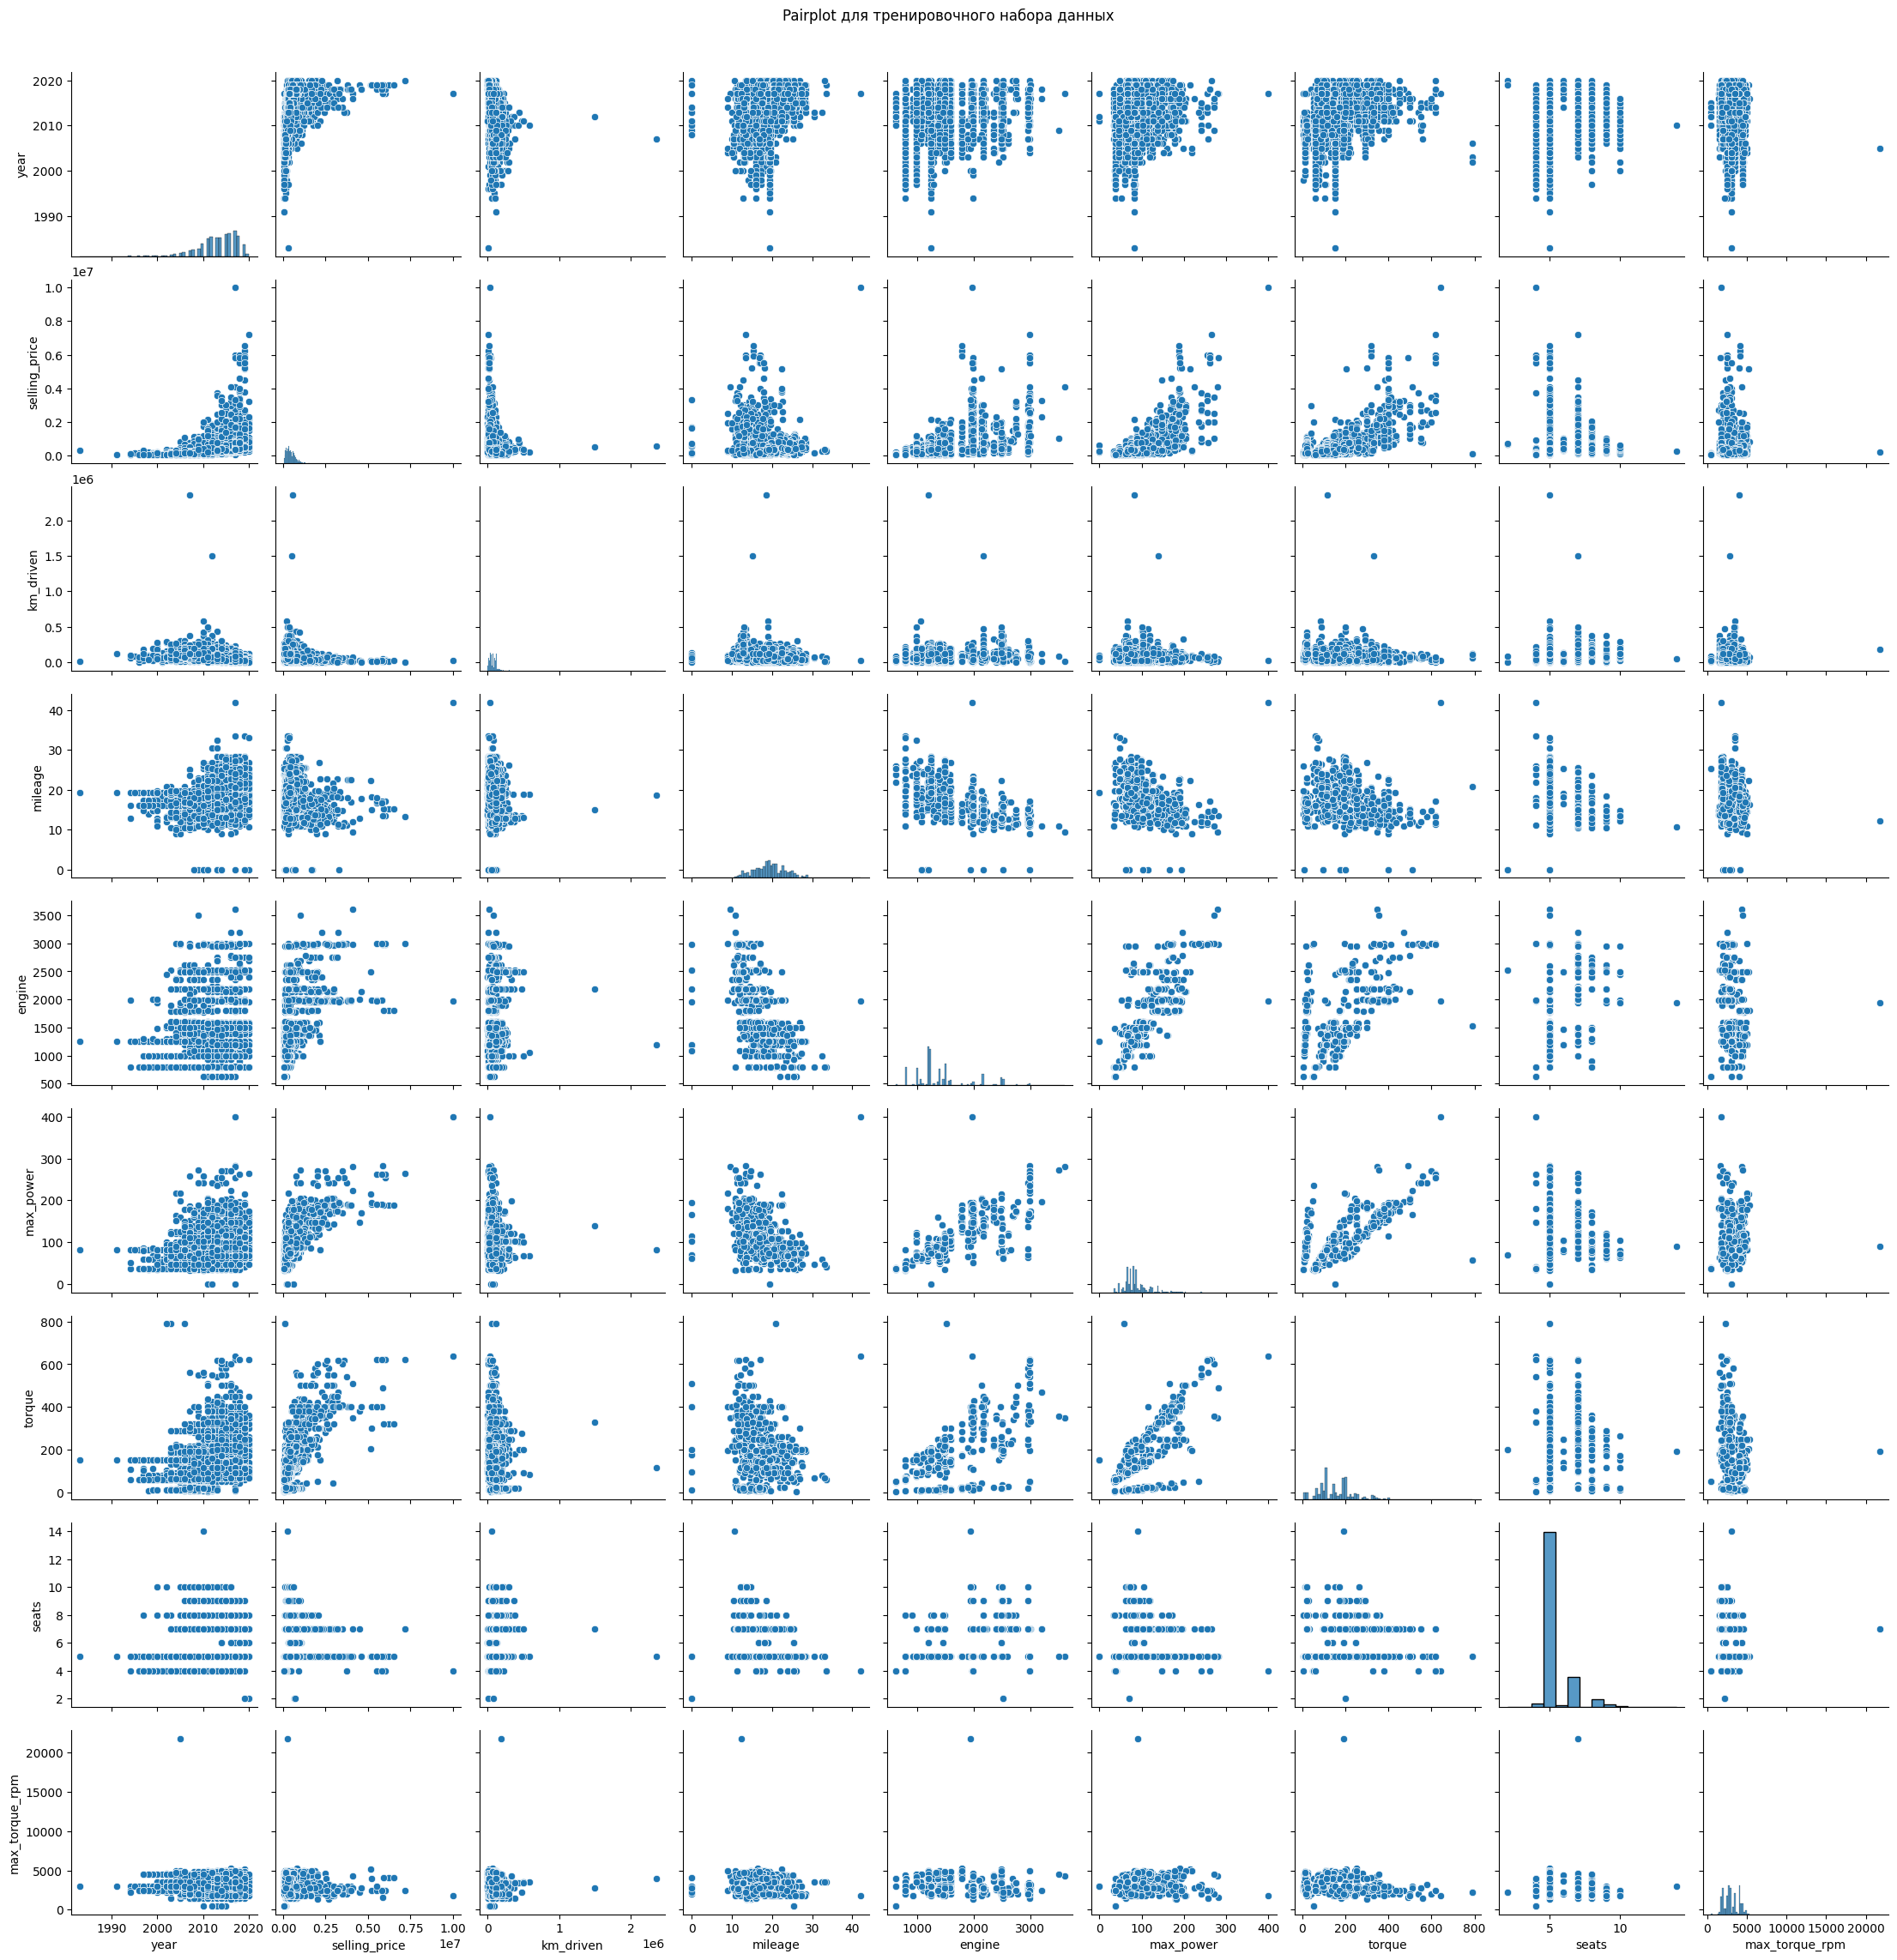

In [ ]:
numeric_features = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

sns.pairplot(df_train[numeric_features])
plt.suptitle('Pairplot для тренировочного набора данных', y=1.02)
plt.show()

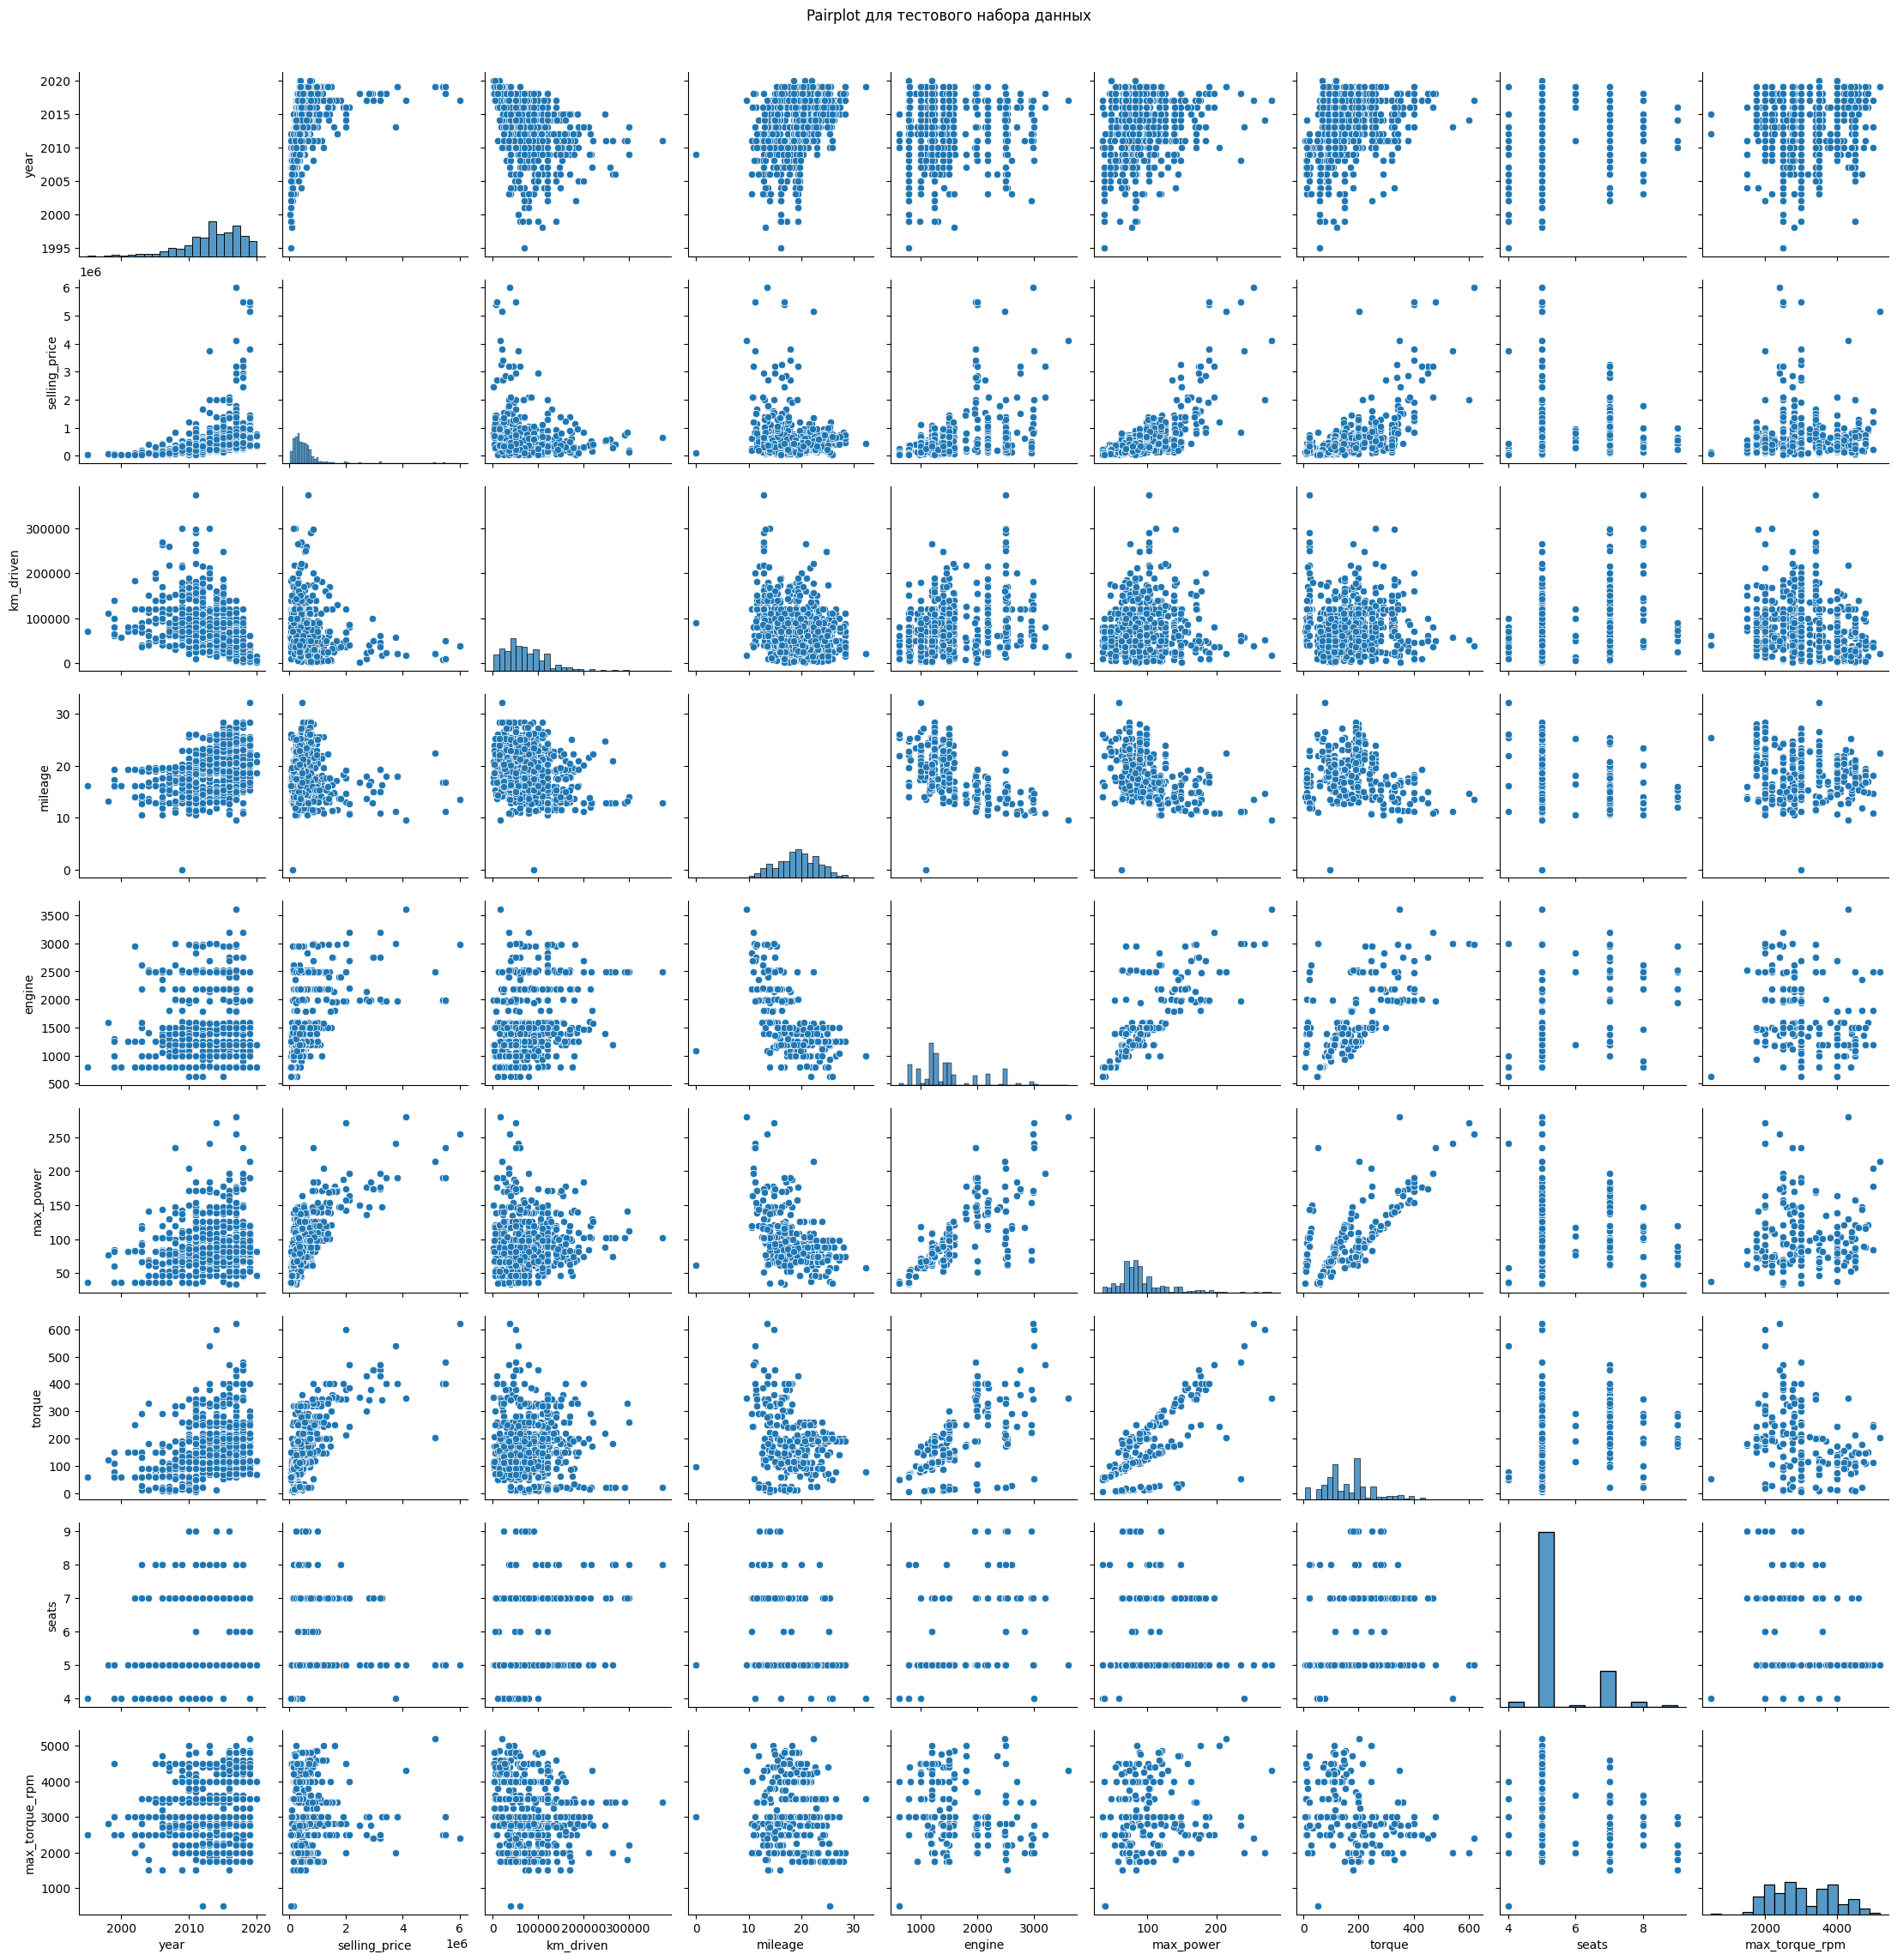

In [ ]:
sns.pairplot(df_test[numeric_features])
plt.suptitle('Pairplot для тестового набора данных', y=1.02)
plt.show()

In [ ]:
Выводы:
Зависимость целевой переменной присутствует с:
годом выпуска - чем позже выпущена машина, тем она дороже
макс. мощностью - чем выше мощность,  тем дороже машина
а также крутящий момент и двигатель
наибольшая корреляция заметна между макс. мощностью и двигателем; крутящем моментом и макс. мощностью; пробегом и двигателем.
Данные в train и test выборках схожи, но выбросов в тренировочной выборке больше тк объем также больше

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

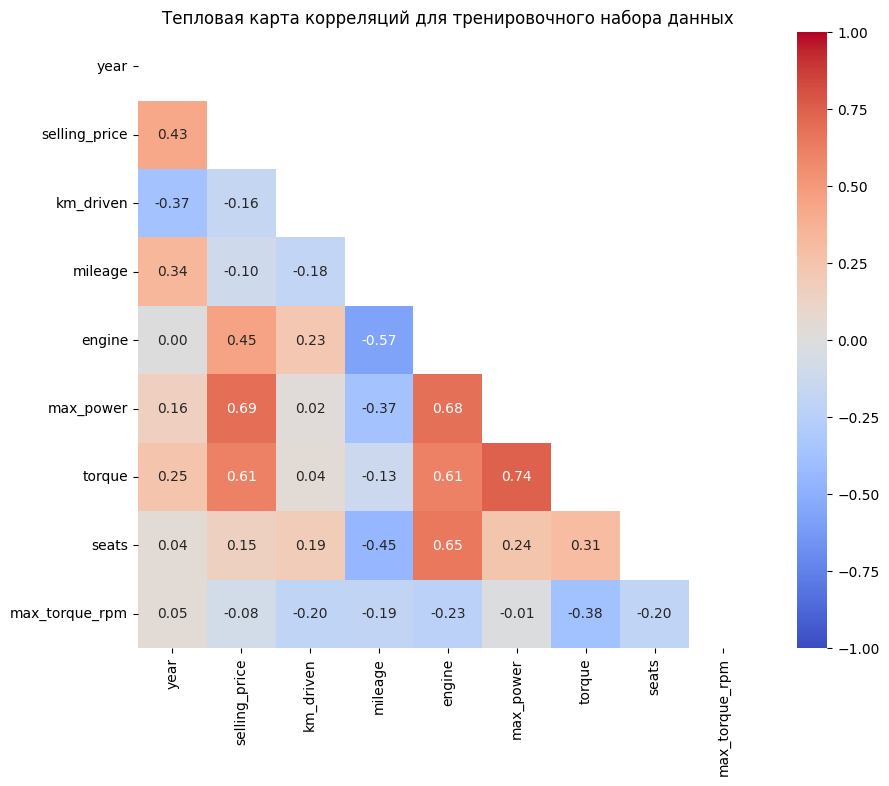

In [ ]:
corr_matrix = df_train[numeric_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Тепловая карта корреляций для тренировочного набора данных')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [ ]:
1. наименьшая корреляция наблюдается между engine и year.
2. наибольшая корреляция между max_power и torque; max_power и engine.
3. да, тк коэффициент корреляции отрицательный.

`Your answer here`

### **Дополнительные визуализации (бонус 0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (4 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 4 основных баллов;

### **Задание 10 (0.3 балла)**

Создайте копии тренировочного и тестового датафреймов, в которых останутся только вещественные признаки (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [18]:
y_train = df_train['selling_price'].values.reshape(-1, 1)
X_train = df_train.select_dtypes(include=[np.number]).drop(columns=['selling_price'])

In [19]:
assert X_train.shape == (5840, 8)

In [20]:
y_test = df_test['selling_price'].values.reshape(-1, 1)
X_test = df_test.select_dtypes(include=[np.number]).drop(columns=['selling_price'])

In [21]:
assert X_test.shape == (1000, 8)

### **Задание 11 (1 балл)**

Построим нашу первую модель!
- [ ] Найдите паремтры модели с помощью аналитического решения уравнения $\theta = (X^T X)^{-1} X^T y$. *Параметры ищите только по датасету `train`.* Не забудьте добавить столбец из единиц в качестве свободного члена!
- [ ] Посчтитайте $R^2$ и $MSE$ для трейна и для теста (с помощью готовых решений из sklearn).
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [22]:
from sklearn.metrics import r2_score, mean_squared_error as MSE


X_train_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])
X_test_b = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])

# Вычисление коэффициентов линейной регрессии методом наименьших квадратов
# Формула: θ = (X^T * X)^(-1) * X^T * y
theta_best = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

# Вывод найденных коэффициентов
print("Оцененные коэффициенты (θ):", theta_best.ravel())

Оцененные коэффициенты (θ): [-7.88119264e+07  3.91387420e+04 -8.01267737e-01 -2.93841808e+03
  4.29847424e+01  9.64082281e+03  4.52896563e+02 -3.30146420e+04
 -5.08362134e+01]


In [23]:
# Подсчет предсказаний
y_predict_train = X_train_b @ theta_best
y_predict_test = X_test_b @ theta_best

In [24]:
# Оценка модели
r2_train = r2_score(y_train, y_predict_train)
mse_train = MSE(y_train, y_predict_train)

r2_test = r2_score(y_test, y_predict_test)
mse_test = MSE(y_test, y_predict_test)

print('R² на тренировочном наборе', r2_train)
print('MSE на тренировочном наборе', mse_train)
print('R² на тестовом наборе', r2_test)
print('MSE на тестовом наборе', mse_test)

R² на тренировочном наборе 0.6026624688984374
MSE на тренировочном наборе 113892169682.17694
R² на тестовом наборе 0.6016123193708581
MSE на тестовом наборе 229004615040.1995


In [ ]:
1. R² в тестовом и тренировочном наборах не сильно различаются, а значит модель не переобучена.
2. Значения MSE высоки, что говорит о наличии выбросов.

`Your answer here`

### **Задание 12. (0.3 балла)**
Теперь сравним результаты с готовым решением из библиотеки sklearn.

- [ ] Обучите классическую линейную регрессию с дефолтными параметрами c помощью LinearRegression.
- [ ] Посчтитайте $R^2$ и $MSE$ для трейна и для теста.


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
mse_train = MSE(y_train, y_pred_train)

r2_test = r2_score(y_test, y_pred_test)
mse_test = MSE(y_test, y_pred_test)

print('R² на тренировочном наборе', r2_train)
print('MSE на тренировочном наборе', mse_train)
print('R² на тестовом наборе', r2_test)
print('MSE на тестовом наборе', mse_test)

R² на тренировочном наборе 0.6026624688984356
MSE на тренировочном наборе 113892169682.1775
R² на тестовом наборе 0.6016123193664653
MSE на тестовом наборе 229004615042.72464


### **Задание 13 (0.2 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте признаки в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Задание 14 (0.2 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train)
coefficients = lin_reg_scaled.coef_

In [ ]:
feature_names = X_train.columns

most_informative_index = np.argmax(np.abs(coefficients))
most_informative_feature = feature_names[most_informative_index]

print('Наиболее информативный признак', most_informative_feature)

Наиболее информативный признак max_power


### **Задание 15 (0.3 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
mse_train_lasso = MSE(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
mse_test_lasso = MSE(y_test, y_pred_test_lasso)
print('Lasso R² на тренировочном наборе', r2_train_lasso)
print('Lasso MSE на тренировочном наборе', mse_train_lasso)
print('Lasso R² на тестовом наборе', r2_test_lasso)
print('Lasso MSE на тестовом наборе', mse_test_lasso)

Lasso R² на тренировочном наборе 0.602662468850187
Lasso MSE на тренировочном наборе 113892169696.00739
Lasso R² на тестовом наборе 0.6016110276175533
Lasso MSE на тестовом наборе 229005357576.886


In [ ]:
zero_coefficients = np.sum(lasso.coef_ == 0)
zero_coefficients

np.int64(0)

In [ ]:
R² и среднеквадратичная ошибка рассчитанные:
вручную, с помощью готового решения из библиотеки sklearn и Лассо регрессией
совпадают (с учетом погрешности) и это значит, что модель стабильна и реализована корректно.

### **Задание 16. Реализация градиентного бустинга (1.2 балла)**

Теперь попробуем применить метод градиентного спуска для решения уравнения линейной регресии. Вам предстоит дополнить код так, чтобы получился алгоритм полного градиентного спуска. Затем, с помощью полученной функции предстоит снова обучить модель на `train` данных и сделать два предсказания: для `train` и `test`.


**Ваша задача :**

- [ ] Добавить столбец из единиц к своему датасету
- [ ] Дополнить функцию градиентного спуска
- [ ] Применить полученную функцию к train датасету
- [ ] Сделать предсказания для `train` и `test`. Оценить предсказания с помощью $R^2$ и $MSE$.

In [ ]:
# Доработайте: добавьте столбец единиц к X
X_train_b = ...  # Ваш код здесь

# Функция градиентного спуска
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    """
    Реализация градиентного спуска для линейной регрессии.

    Параметры:
    X - матрица признаков с добавленным единичным столбцом
    y - вектор целевой переменной
    learning_rate - скорость обучения
    n_iterations - количество итераций

    Возвращает:
    theta - оцененные коэффициенты модели
    """
    m, n = X.shape  # Количество примеров (m) и количество признаков (n)
    theta = ...  # Инициализируйте theta случайными значениями

    for iteration in range(n_iterations):
        gradients = ...  # Рассчитайте градиент функции потерь (MSE)
        theta -= ...  # Обновите параметры

        if iteration % 100 == 0:
            mse = ...  # Вычислите MSE для отслеживания процесса
            print(f"Итерация {iteration}: MSE = {mse:.4f}")

    return theta

# Доработайте: вызовите функцию градиентного спуска
theta_gd = ...  # Ваш код здесь
print("Оцененные коэффициенты (градиентный спуск):", theta_gd.ravel())

In [ ]:
# Получите новые предсказания для train и test
y_pred_test_grad = ...  # Вычислите предсказания для test
y_pred_train_grad = ...  # Вычислите предсказания для train

# Посчитайте RMSE и R2
 ...  # Ваш код здесь

IndentationError: unexpected indent (<ipython-input-2-f15cd393a7e8>, line 6)

### Задание 17 (0.5 балла):

- [ ] Сделайте еще одно обучение модели для готового решения стохастического градиентного бустинга из sklearn
- [ ] Оцените результаты с помощью $R^2$ и $MSE$

In [ ]:
from sklearn.linear_model import SGDRegressor

# **Часть 3 (1 балл) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 1 основной балл.



### **Задание 19 (0.2 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
unique_names = df_train['name'].unique()
num_unique_names = len(unique_names)

print('Кол-во уникальных значений', num_unique_names)
print(unique_names)

Кол-во уникальных значений 1924
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Hyundai i20 Sportz Diesel' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']


In [ ]:
df_train = df_train.drop('selling_price', axis=1).copy()
df_test = df_test.drop('selling_price', axis=1).copy()

In [ ]:
df_train['name'] = df_train['name'].apply(lambda x: ' '.join(x.split()[:2]))
df_test['name'] = df_test['name'].apply(lambda x: ' '.join(x.split()[:2]))

In [ ]:
assert X_train_cat.shape == (5840, 13)

NameError: name 'X_train_cat' is not defined

### **Задание 20 (0.2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
combined = pd.concat([df_train, df_test], axis=0)

cat_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
num_columns = ['mileage', 'km_driven', 'max_power', 'year', 'engine', 'max_torque_rpm', 'torque']

X_combined_encoded = encoder.fit_transform(combined[cat_columns])

X_train_encoded = X_combined_encoded[:len(df_train), :]
X_test_encoded = X_combined_encoded[len(df_train):, :]

X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out())
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())

X_train_encoded = pd.concat([X_train_encoded, df_train[num_columns].reset_index(drop=True)], axis=1)
X_test_encoded = pd.concat([X_test_encoded, df_test[num_columns].reset_index(drop=True)], axis=1)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

In [ ]:
1. кодирование ОНЕ важно проводить на обучающей выборке.
2. это помогает предотвратить мультиколлинеарность.
3. не всегда, тк "неважные признаки" возможно помогут избежать переобучении модели и провести обобщение.

### **Задание 22 (0.4 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Обучите Ridge регрессию на новом датасете
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge

# your code here

name  year  km_driven    fuel seller_type transmission  \
0       Maruti Swift  2014     145500  Diesel  Individual       Manual   
1        Skoda Rapid  2014     120000  Diesel  Individual       Manual   
2        Hyundai i20  2010     127000  Diesel  Individual       Manual   
3       Maruti Swift  2007     120000  Petrol  Individual       Manual   
4      Hyundai Xcent  2017      45000  Petrol  Individual       Manual   
...              ...   ...        ...     ...         ...          ...   
5835  Hyundai Santro  2008     191000  Petrol  Individual       Manual   
5836    Maruti Wagon  2013      50000  Petrol  Individual       Manual   
5837     Hyundai i20  2013     110000  Petrol  Individual       Manual   
5838   Hyundai Verna  2007     119000  Diesel  Individual       Manual   
5839    Maruti Swift  2009     120000  Diesel  Individual       Manual   

                     owner  mileage  engine  max_power  torque  seats  \
0              First Owner    23.40    1248      74.00  190.00      5   
1             Second Owner    21.14    1498     103.52  250.00      5   
2              First Owner    23.00    1396      90.00   22.40      5   
3              First Owner    16.10    1298      88.20   11.50      5   
4              First Owner    20.14    1197      81.86  113.75      5   
...                    ...      ...     ...        ...     ...    ...   
5835           First Owner    17.92    1086      62.10   96.10      5   
5836          Second Owner    18.90     998      67.10   90.00      5   
5837           First Owner    18.50    1197      82.85  113.70      5   
5838  Fourth & Above Owner    16.80    1493     110.00   24.00      5   
5839           First Owner    19.30    1248      73.90  190.00      5   

                     torque_str  max_torque_rpm  
0                190Nm@ 2000rpm          2000.0  
1           250Nm@ 1500-2500rpm          2500.0  
2      22.4 kgm at 1750-2750rpm          2750.0  
3         11.5@ 4,500(kgm@ rpm)          4500.0  
4             113.75nm@ 4000rpm          4000.0  
...                         ...             ...  
5835            96.1Nm@ 3000rpm          3000.0  
5836              90Nm@ 3500rpm          3500.0  
5837           113.7Nm@ 4000rpm          4000.0  
5838  24@ 1,900-2,750(kgm@ rpm)          2750.0  
5839             190Nm@ 2000rpm          2000.0  

[5840 rows x 14 columns]

# **Часть 4 - бонусная (2 балла) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
#Сгенерировать новые признаки на основе уже существующих
#Ежегодный пробег
df_train['mil per year'] = df_train['mileage'] / (2025 - df['year'])
df_test['mil per year'] = df_test['mileage'] / (2025 - df['year'])
#Квадрат года выпуска
df_train['year_squared'] = df_train['year'] ** 2
df_test['year_squared'] = df_test['year'] ** 2

# **Часть 4. | Бизнесовая (1 балл)**

### **Задание 23 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    percentage_diff = np.abs((y_true - y_pred) / y_true)
    metric = np.mean(percentage_diff <= 0.10)
    return np.mean(within_10_percent)

### **Задание 24 (0.5 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# Заключительная часть

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Теперь можно отдохнуть и похвалить себя. Но пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой :)


Поделитесь впечатлениями о задании:

    (ваши эмоции от домашней работы)

P.S Удачного кодинга!  
Пейте черничный латте, пишите красивый Python!!